In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")

In [4]:
df = train.copy()

## EDA
#### What is the distribution of loan_paid_back? Is there significant class imbalance, and if so, how severe (e.g., 90-10, 70-30)?

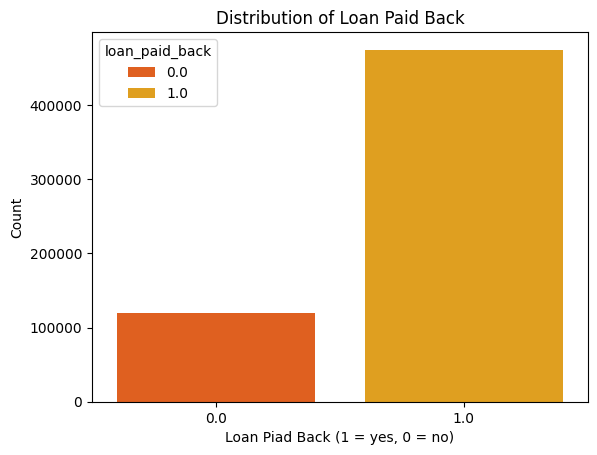

In [5]:
# Bar plot
sns.countplot(x='loan_paid_back', data=df, palette='autumn', hue='loan_paid_back')
plt.title('Distribution of Loan Paid Back')
plt.xlabel('Loan Piad Back (1 = yes, 0 = no)')
plt.ylabel('Count')
plt.show()

In [6]:
df['loan_paid_back'].value_counts(normalize=True)

loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64

> Which means **79%** of loans were paid back, **20%** were not.

#### For each numerical feature (credit_score, annual_income, debt_to_income_ratio, loan_amount, interest_rate), what are the distributions for paid vs not-paid loans? Are there clear separation patterns?

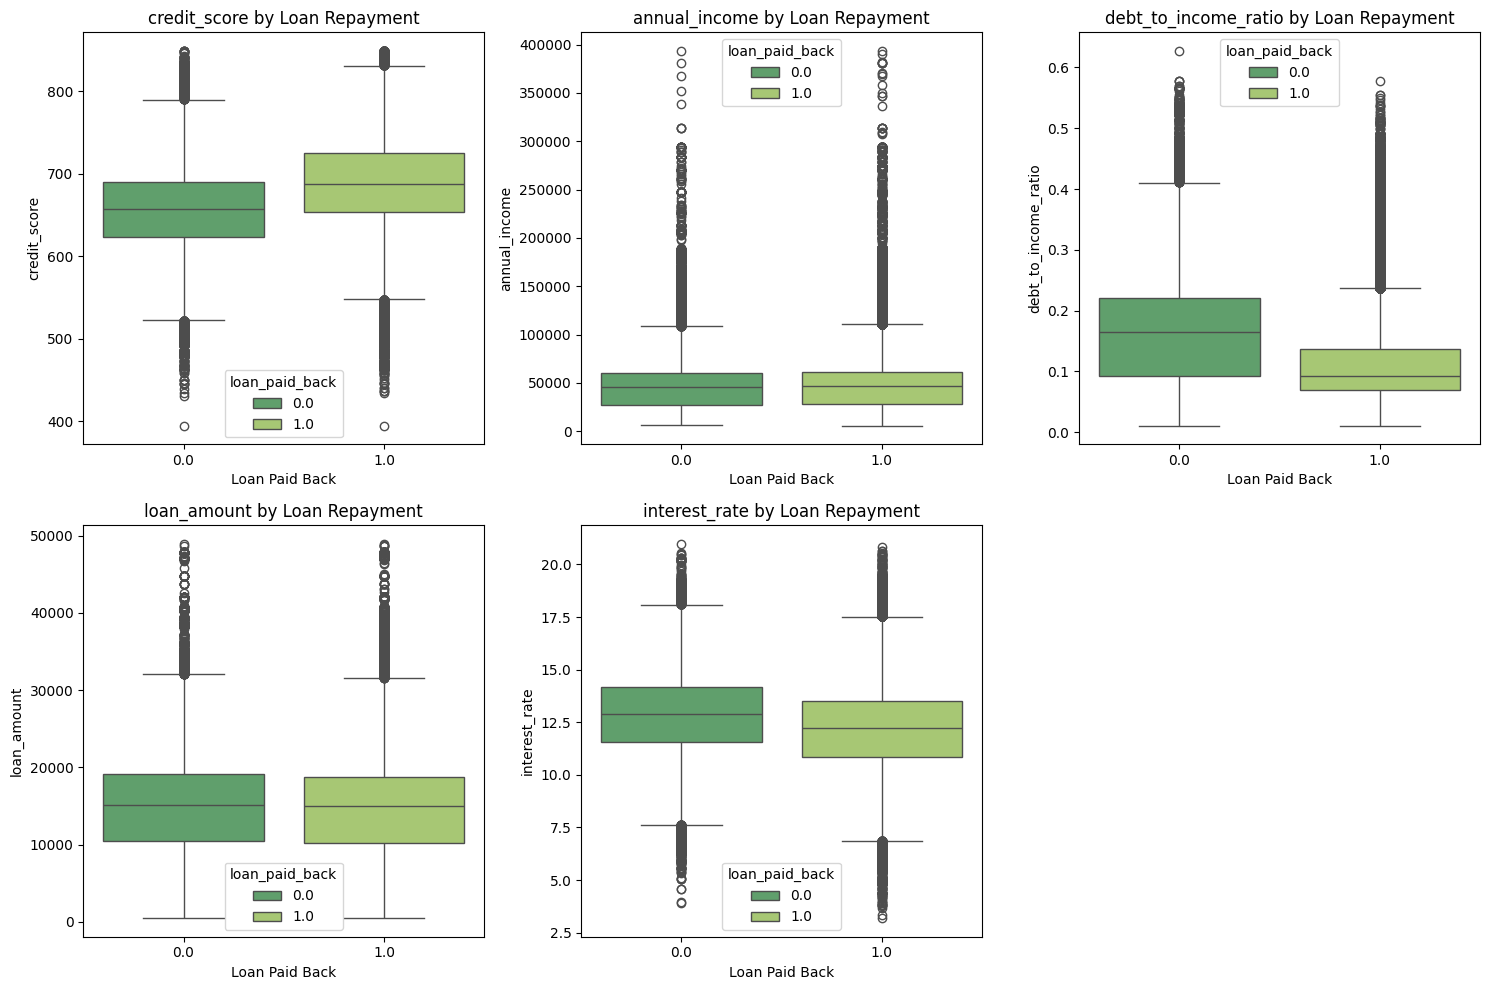

In [7]:
numerical_features = ['credit_score', 'annual_income', 'debt_to_income_ratio', 'loan_amount', 'interest_rate']

# Set up the figure
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='loan_paid_back', y=feature, data=df, palette='summer', hue='loan_paid_back')
    plt.title(f'{feature} by Loan Repayment')
    plt.xlabel('Loan Paid Back')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**credit_score vs loan_paid_back**  
Class 1 (paid back) has a higher median (~700) and tighter IQR (670–730)!  
Class 0 (not paid) has a lower median (~650) and IQR (620–680)!  
**Interpretation**: This shows moderate separation. Higher credit scores are associated with loan repayment.  

**debt_to_income_ratio vs loan_paid_back**  
Class 1: Lower median (~0.10), tighter spread.  
Class 0: Higher median (~0.15), wider spread.  
**Interpretation**: higher debt-to-income ratios correlate with default (strong signal).  

**interest_rate vs loan_paid_back**  
Class 1: Slightly lower median (~12.5)  
Class 0: Slightly higher median (~13)  
**Interpretation**: Weak to moderate separation, higher interest rates may reflect riskier borrowers.  

**annual_income vs loan_paid_back**  
Both classes have nearly identical distributions.  
**Interpretation**: No separation, income alone doesn’t distinguish repayment behavior.  

**loan_amount vs loan_paid_back**  
Identical distributions across classes.  
**Interpretation**: No separation, loan size isn’t predictive on its own.

#### What is the correlation matrix for numerical features? Are any features highly correlated with each other (>0.7 or >0.8)? 


In [10]:
corr_matrix = df[numerical_features].corr()
#corr_matrix

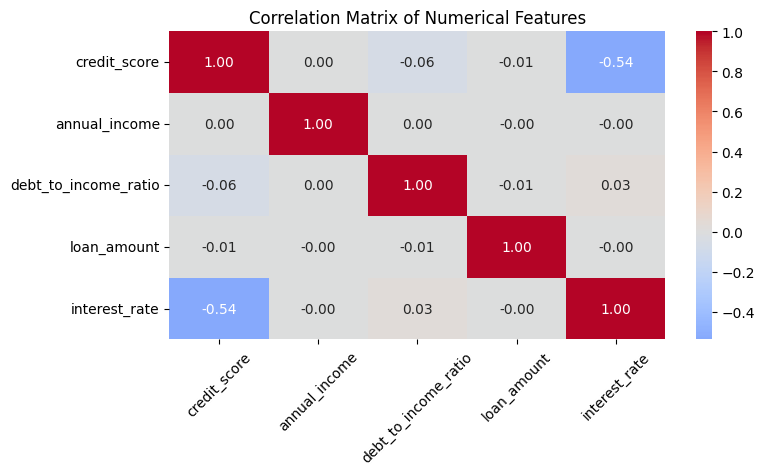

In [17]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

# Rotate x-axis and y-axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

Low pairwise correlation (near 0) between numerical features means:
1. They are not linearly related to each other.
2. Each feature may carry independent information.

#### For each categorical feature (loan_purpose, employment_status, education_level, grade_subgrade), what is the default rate per category? Which categories are highest/lowest risk?

In [30]:
loan_purpose_groups_default_rate = df.groupby('loan_purpose')['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

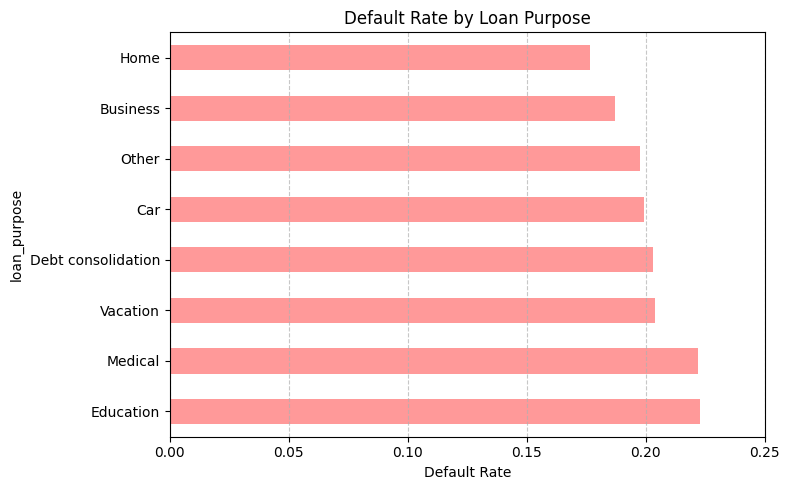

In [32]:
plt.figure(figsize=(8, 5))
loan_purpose_groups_default_rate.plot(kind='barh', color='#ff9999')
plt.xlabel('Default Rate')
plt.title('Default Rate by Loan Purpose')
plt.xlim(0, 0.25)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
gender_groups_default_rate = df.groupby('gender')['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

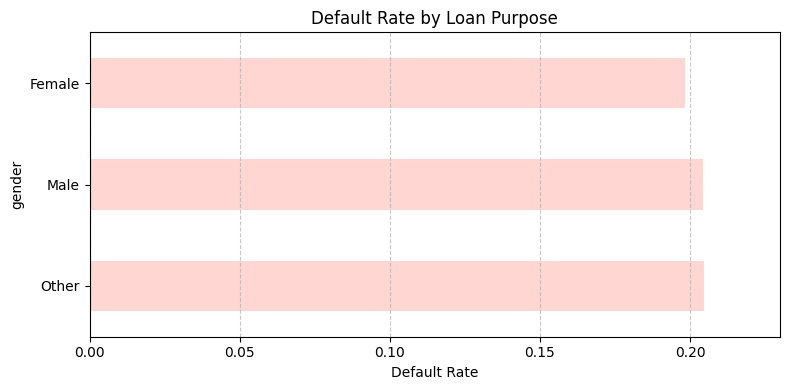

In [38]:
plt.figure(figsize=(8, 4))
gender_groups_default_rate.plot(kind='barh', color='#ff322133')
plt.xlabel('Default Rate')
plt.title('Default Rate by Loan Purpose')
plt.xlim(0, 0.23)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
marita_status_groups_default_rate = df.groupby('marital_status')['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

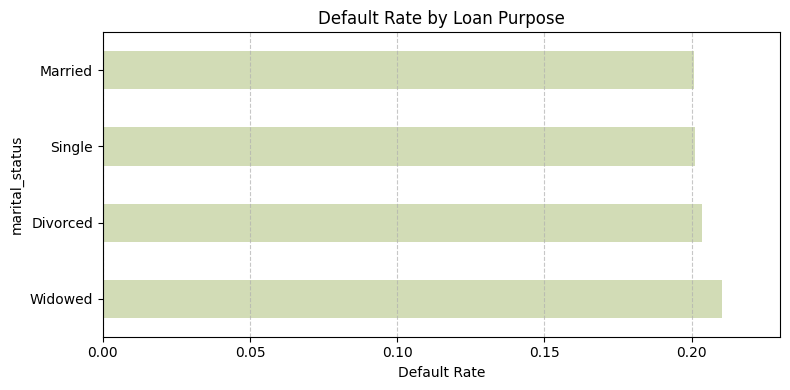

In [43]:
plt.figure(figsize=(8, 4))
marita_status_groups_default_rate.plot(kind='barh', color='#D2DCB6')
plt.xlabel('Default Rate')
plt.title('Default Rate by Loan Purpose')
plt.xlim(0, 0.23)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
employment_status_groups_default_rate = df.groupby("employment_status")['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

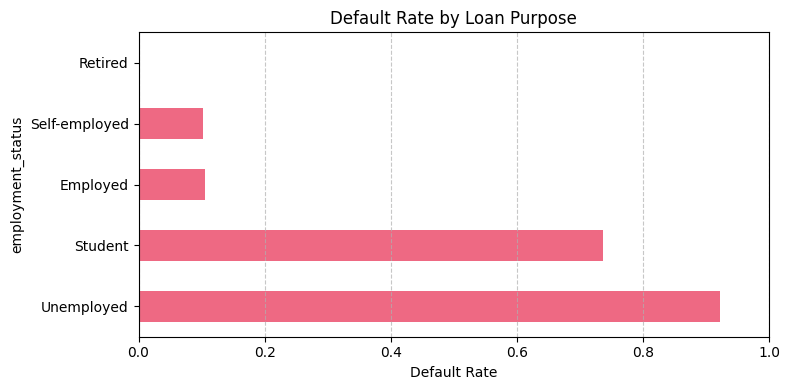

In [47]:
plt.figure(figsize=(8, 4))
employment_status_groups_default_rate.plot(kind='barh', color='#EE6983')
plt.xlabel('Default Rate')
plt.title('Default Rate by Loan Purpose')
plt.xlim(0, 1)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
grade_subgrade_groups_default_rate = df.groupby('grade_subgrade')['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

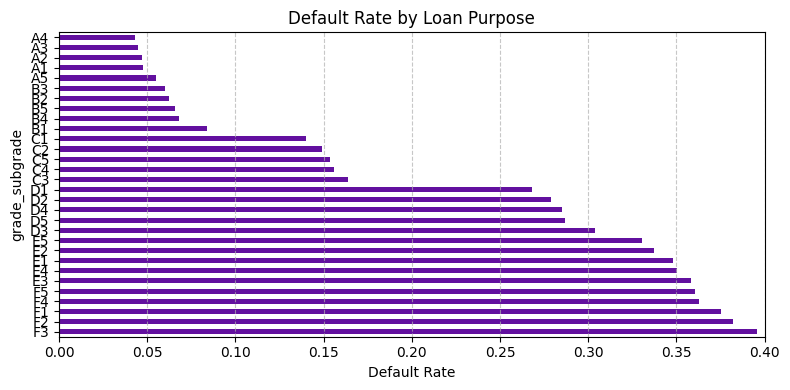

In [52]:
plt.figure(figsize=(8, 4))
grade_subgrade_groups_default_rate.plot(kind='barh', color='#62109F')
plt.xlabel('Default Rate')
plt.title('Default Rate by Loan Purpose')
plt.xlim(0, 0.4)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
df.head(2)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
